<a href="https://colab.research.google.com/github/ENKI0311/MIT-Data_Science_Coursework/blob/main/MIT_FDS_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

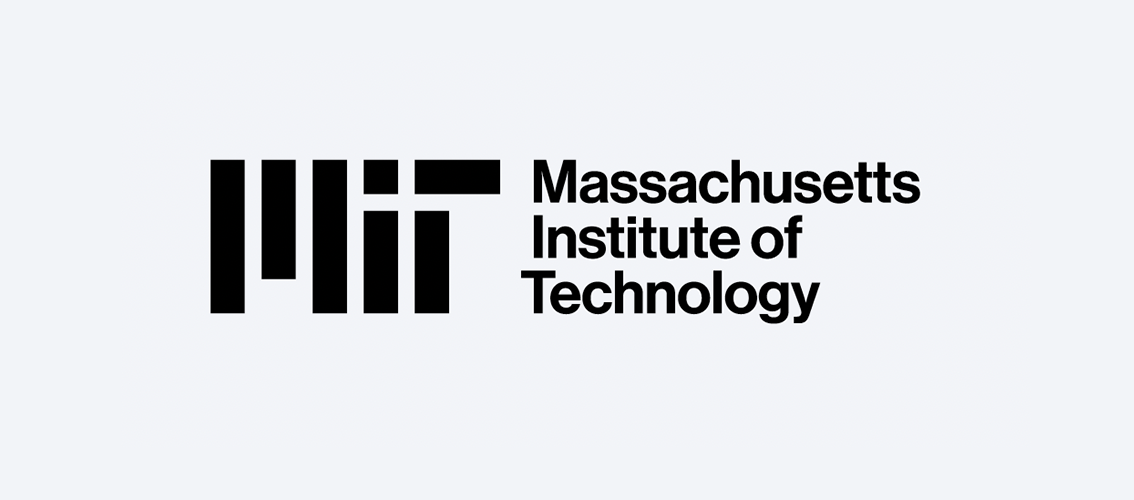

# By: John Chilton

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Understanding the structure of the data

In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/lab_mount/MIT_Data_Science/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
df.shape # Shape of the data

(1898, 9)

#### Observations: 9 Coluimns & 1898 Rows


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
df.info() # Information for Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: int64, object, and float64


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
df.isnull().sum() # Missing Valus of the data

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: There are 0 missing values


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
df.describe(include='all').T # Describe the data

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations: The minium is 20.0, The average 27.0, the Maxium is 35.0


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
cat_cols = ['rating'] # How many orders
for column in cat_cols:
  print(df['rating'].value_counts())
  print("_" * 50)

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64
__________________________________________________


#### Observations: Number of the orders not rated: 736.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
df # Data Frame View

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


<Figure size 1500x1000 with 0 Axes>

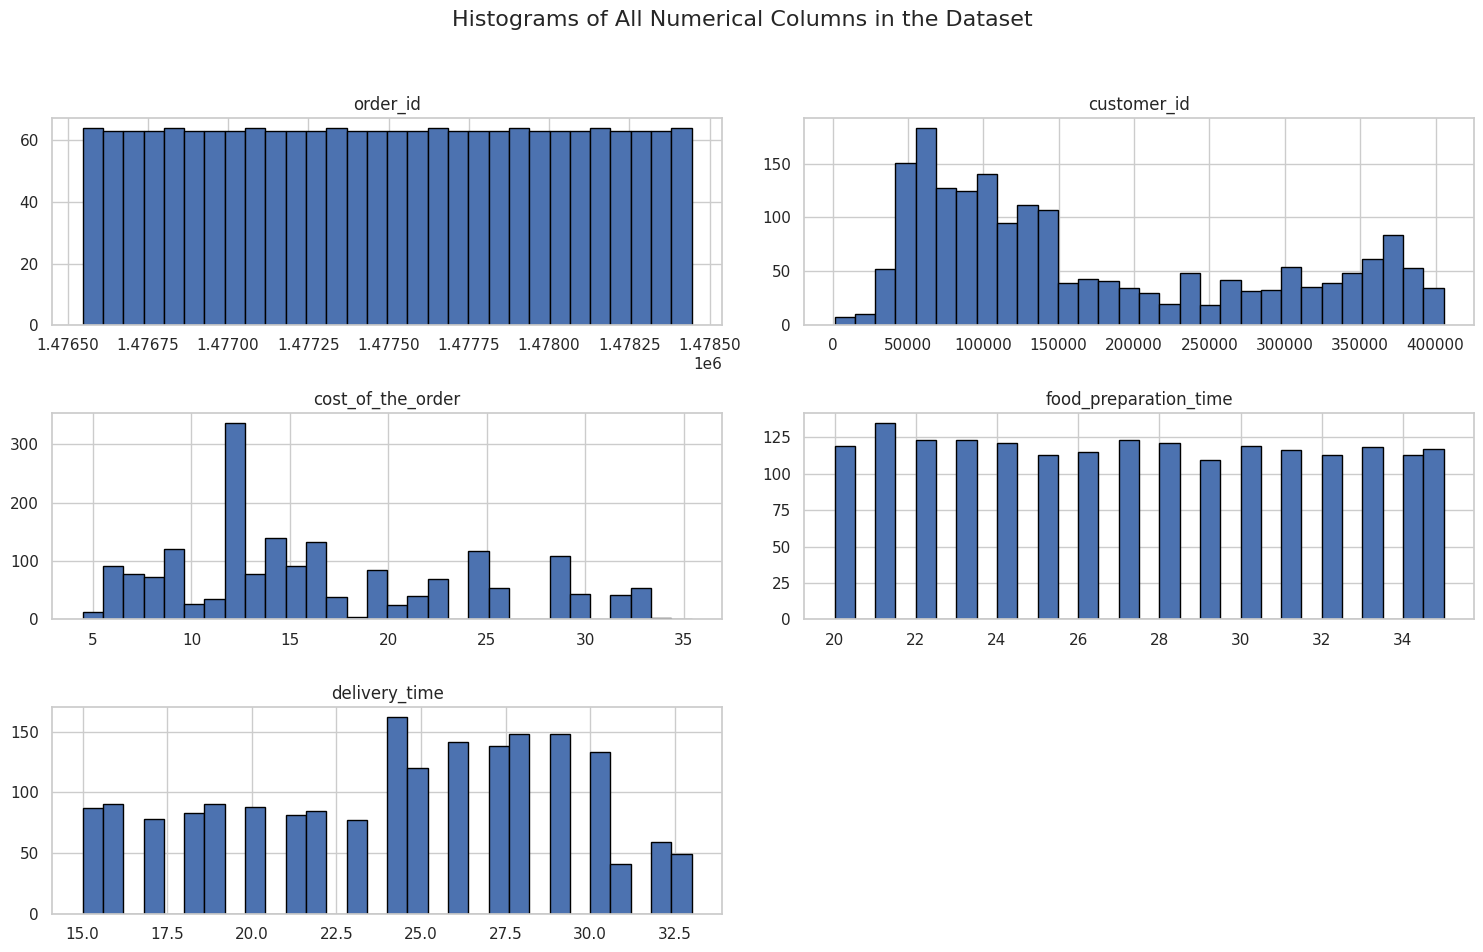

In [ ]:
# 0. Histogram of the entire DataFrame
plt.figure(figsize=(15, 10))
df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of All Numerical Columns in the Dataset', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show();

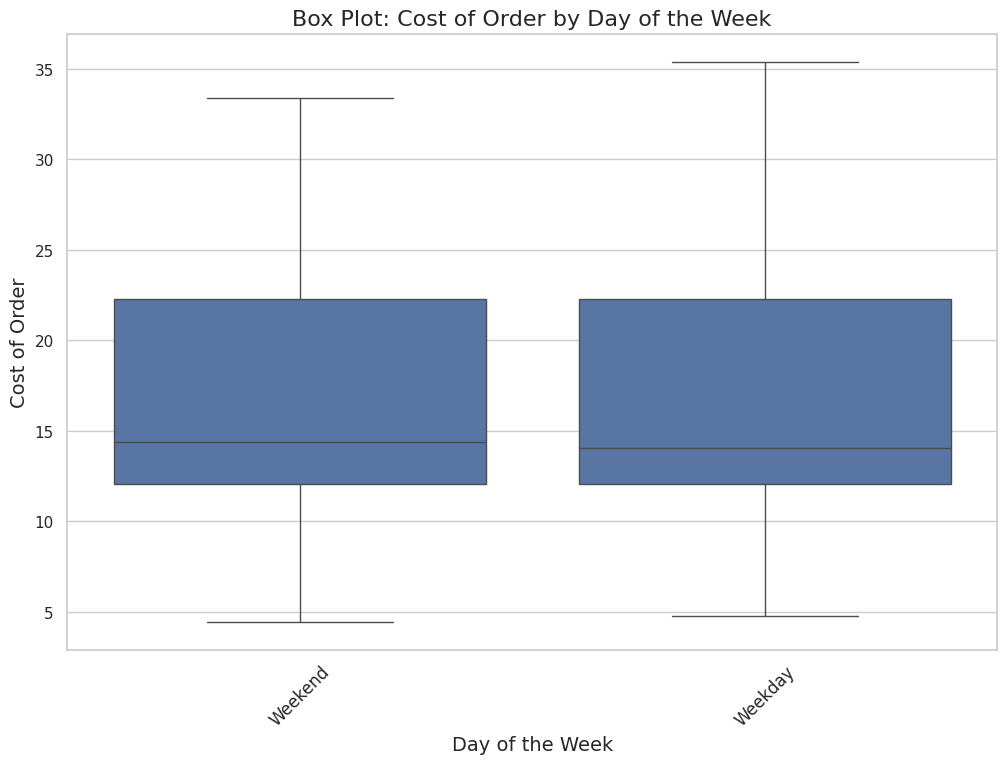

In [ ]:
# 1. Boxplot of Day of the Weekday vs. Weekend
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='day_of_the_week', y='cost_of_the_order')
plt.title('Box Plot: Cost of Order by Day of the Week', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Cost of Order', fontsize=14)
plt.show();

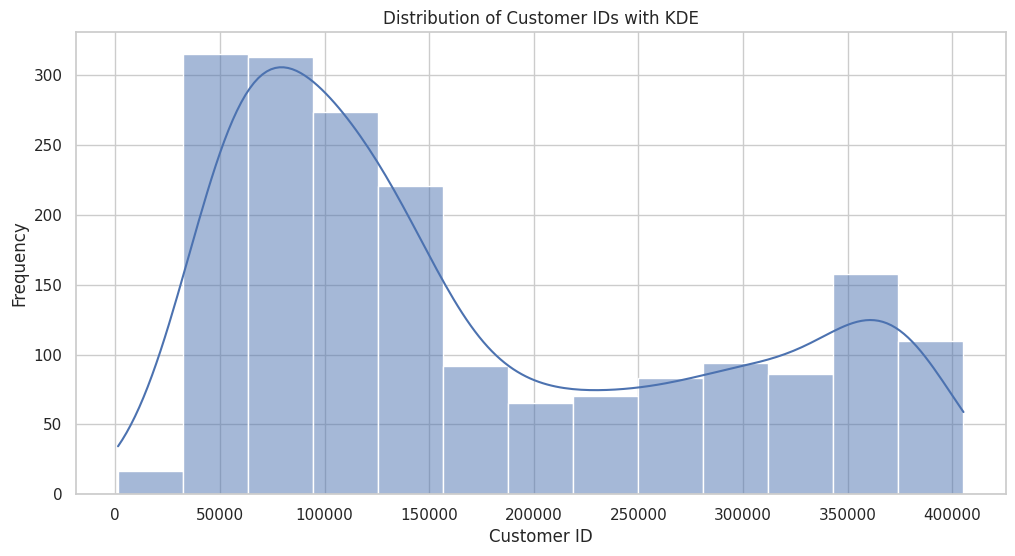

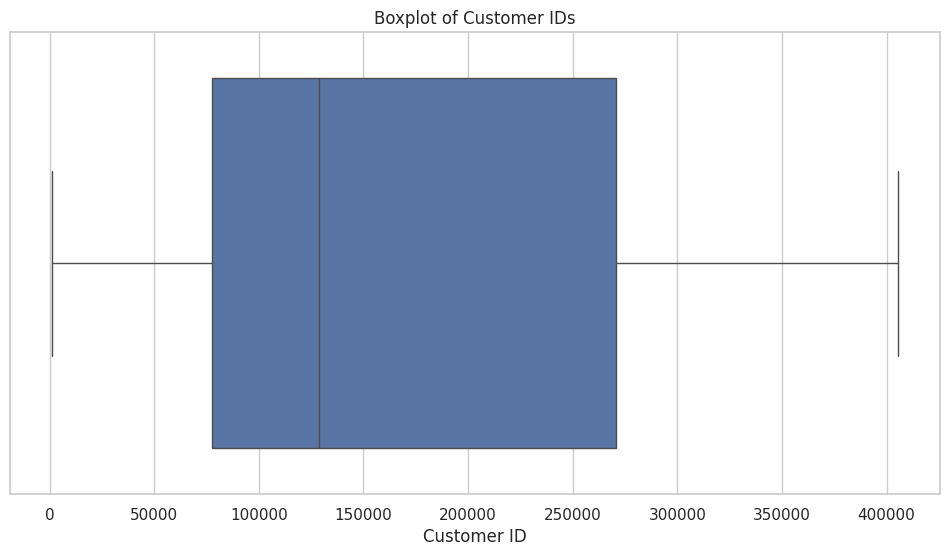

In [ ]:
# 2. Example: histplot with of Customer Id with Boxplot
# Histogram with KDE for customer_id
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='customer_id', kde=True)
plt.title('Distribution of Customer IDs with KDE')
plt.xlabel('Customer ID')
plt.ylabel('Frequency')
plt.show()

# Boxplot for customer_id
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='customer_id')
plt.title('Boxplot of Customer IDs')
plt.xlabel('Customer ID')
plt.show()

<Figure size 1200x600 with 0 Axes>

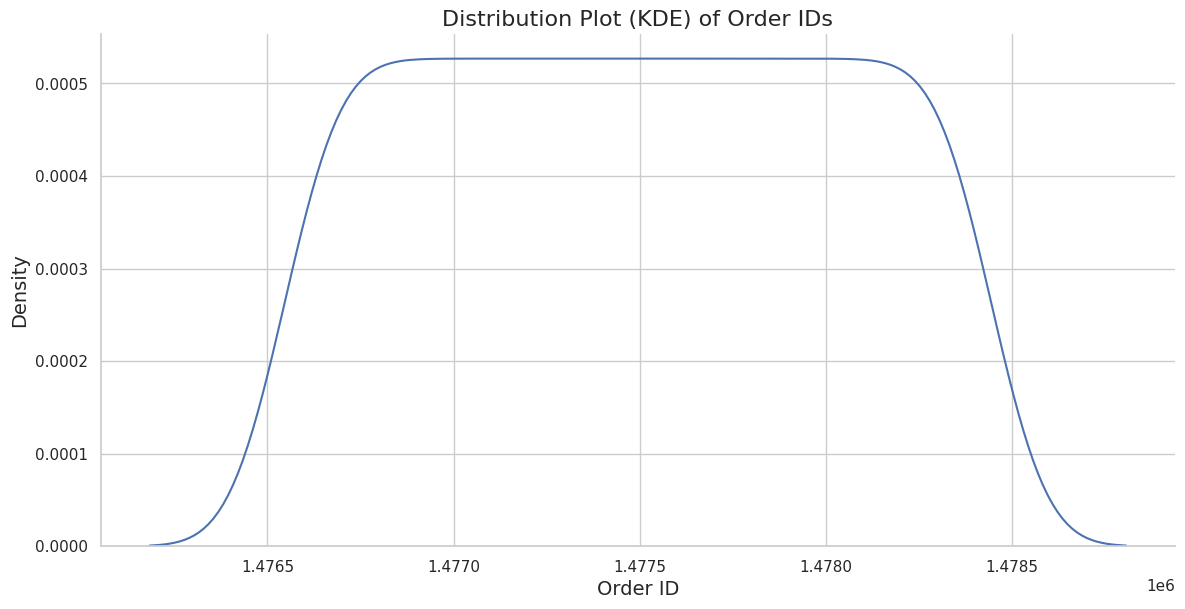

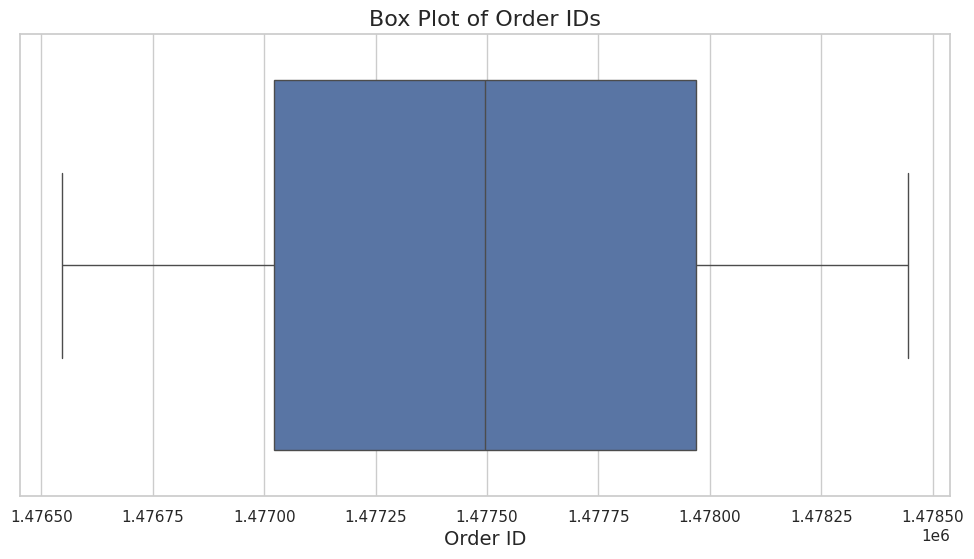

In [ ]:
# 3. Distribution plot (KDE) of order_id
plt.figure(figsize=(12, 6))
sns.displot(data=df, x='order_id', kind='kde', height=6, aspect=2)
plt.title('Distribution Plot (KDE) of Order IDs', fontsize=16)
plt.xlabel('Order ID', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

# Boxplot of order_id
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='order_id')
plt.title('Box Plot of Order IDs', fontsize=16)
plt.xlabel('Order ID', fontsize=14)
plt.show();

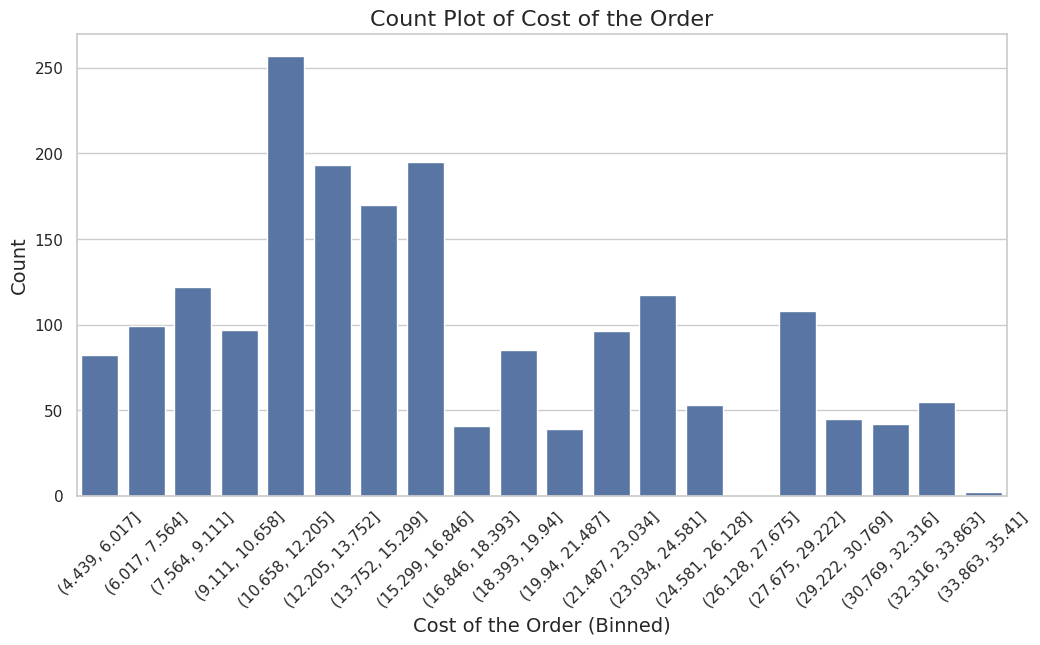

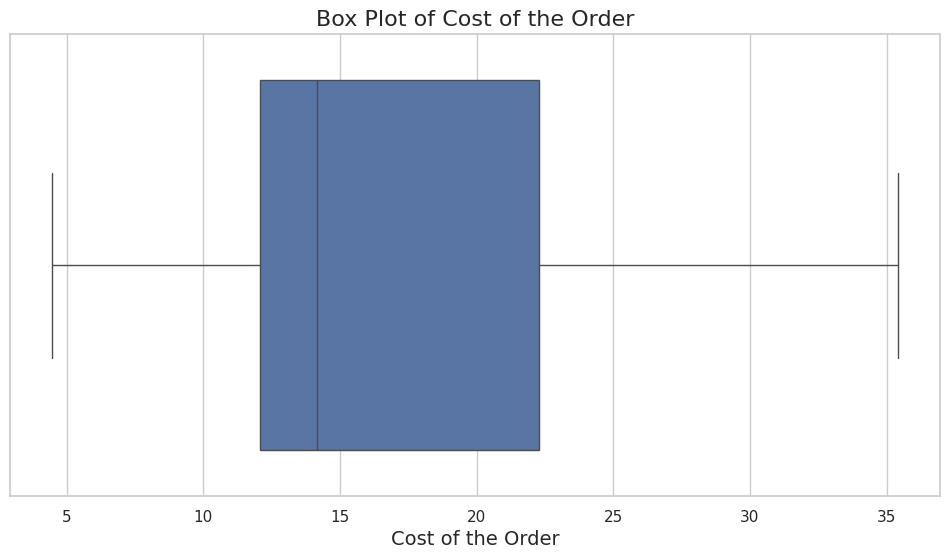

In [ ]:
# 4. Countplot of cost_of_the_order with bins
plt.figure(figsize=(12, 6))
bins = pd.cut(df['cost_of_the_order'], bins=20)
sns.countplot(x=bins)
plt.title('Count Plot of Cost of the Order', fontsize=16)
plt.xlabel('Cost of the Order (Binned)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Boxplot of cost_of_the_order
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='cost_of_the_order')
plt.title('Box Plot of Cost of the Order', fontsize=16)
plt.xlabel('Cost of the Order', fontsize=14)
plt.show();

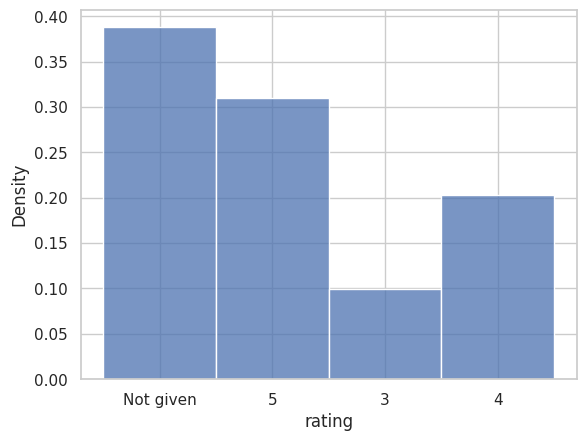

In [ ]:
# 5. Example Histplot of Rating Density
sns.histplot(data=df, x='rating', stat='density')
plt.show();

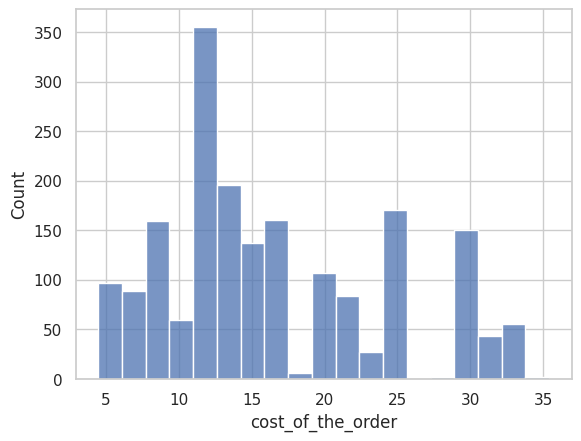

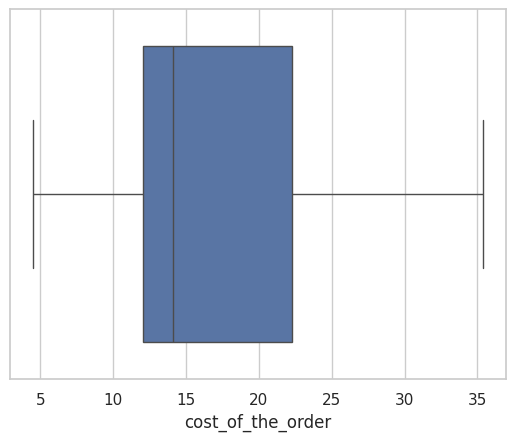

In [ ]:
# 6. Example: Histplot and Boxplot of the Cost of the Order
sns.histplot(data=df, x='cost_of_the_order')
plt.show()
sns.boxplot(data=df, x='cost_of_the_order')
plt.show();

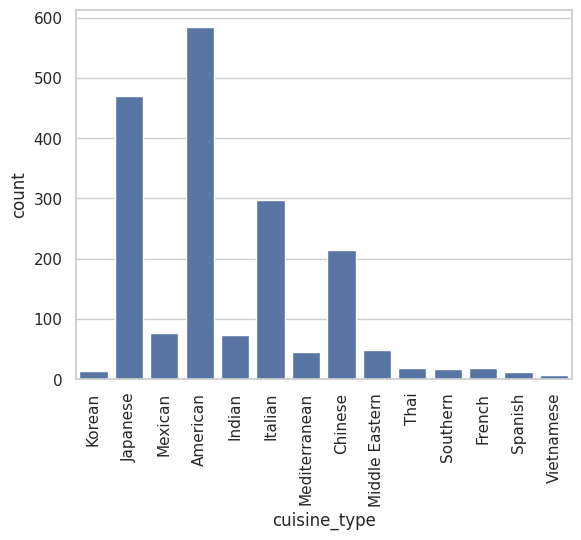

In [ ]:
# 7.Example: Countplot Cuisine Type
sns.countplot(data=df, x='cuisine_type')
plt.xticks(rotation=90)
plt.show();

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Calculate the top 5 restaurants in terms of the number of orders received
top_restaurants_pandas = df['restaurant_name'].value_counts().head(5).reset_index()
top_restaurants_pandas.columns = ['restaurant_name', 'number_of_orders']

top_restaurants_pandas

,restaurant_name,number_of_orders
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observations: Top 5 are 1. Shake Shack, 2. The Meatball Shop, 3. Blue Ribbon Shushi, 4. Ble Ribbon Fried Chicken, 5. Parm


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Filter the data for weekends
weekend_orders = df[df['day_of_the_week'] == 'Weekend']

# Calculate the most popular cuisine on weekends
most_popular_cuisine_weekend = weekend_orders['cuisine_type'].value_counts().idxmax()

most_popular_cuisine_weekend


'American'

#### Observations: Most Popular is American


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Calculate the percentage of orders that cost more than 20 dollars
total_orders = len(df)
orders_over_20 = len(df[df['cost_of_the_order'] > 20])
percentage_over_20 = (orders_over_20 / total_orders) * 100

percentage_over_20


29.24130663856691

#### Observations: The percentage of orders that cost more than 20 dollars is approximately 29.24%.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Calculate the mean order delivery time
mean_delivery_time = df['delivery_time'].mean()

mean_delivery_time


24.161749209694417

#### Observations: The mean order delivery time is approximately 24.16 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Identify the top 3 most frequent customers
top_customers = df['customer_id'].value_counts().head(3).reset_index()
top_customers.columns = ['customer_id', 'number_of_orders']

top_customers


,customer_id,number_of_orders
0,52832,13
1,47440,10
2,83287,9


#### Observations:
### Customer ID 52832: 13 orders,
### Customer ID 47440: 10 orders,
### Customer ID 83287: 9 orders


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [ ]:
# 0. Example: Column View of Cost of the order and Food Preparation Time
df[['cost_of_the_order','food_preparation_time']]

,cost_of_the_order,food_preparation_time
0,30.75,25
1,12.08,25
2,12.23,23
3,29.20,25
4,11.59,25
...,...,...
1893,22.31,31
1894,12.18,31
1895,25.22,31
1896,12.18,23


In [ ]:
# 1. Example: Column view of Rating and Delivery Time
df[['rating','delivery_time']]

,rating,delivery_time
0,Not given,20
1,Not given,23
2,5,28
3,3,15
4,4,24
...,...,...
1893,5,17
1894,5,19
1895,Not given,24
1896,5,31


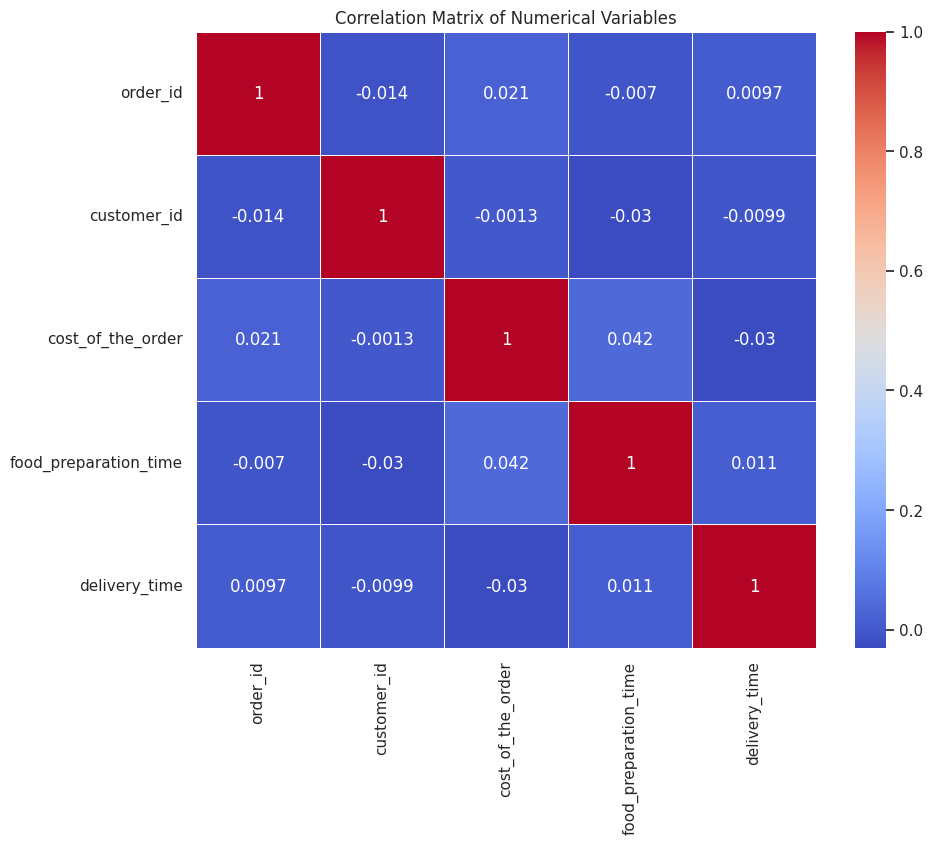

In [ ]:
# 2. Remove any non-numeric columns for the correlation matrix
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Create a correlation matrix for numerical variables
correlation_matrix = numerical_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


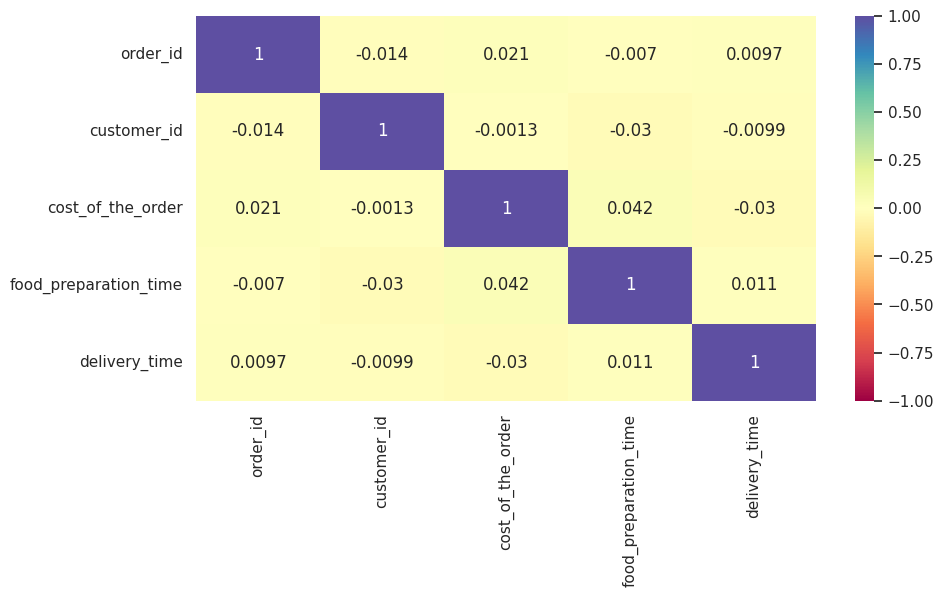

In [ ]:
# 3. Example: Heatmap of the data
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Spectral', vmin=-1, vmax=1)
plt.show()

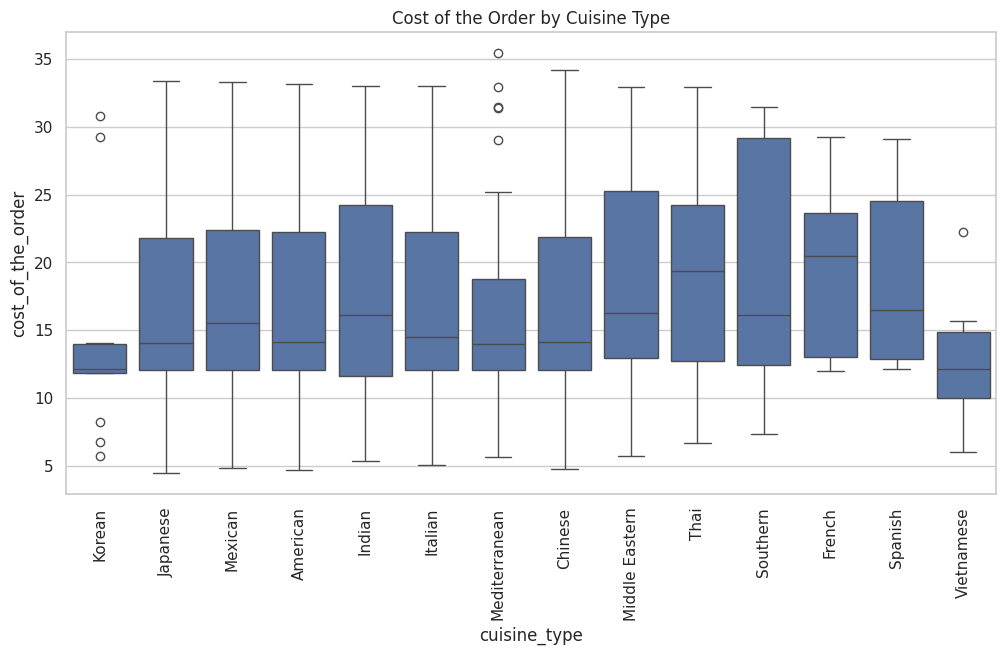

In [ ]:
# 4. Boxplot to explore the relationship between cost_of_the_order and
# cuisine_type

plt.figure(figsize=(12, 6))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.xticks(rotation=90)
plt.title('Cost of the Order by Cuisine Type')
plt.show()


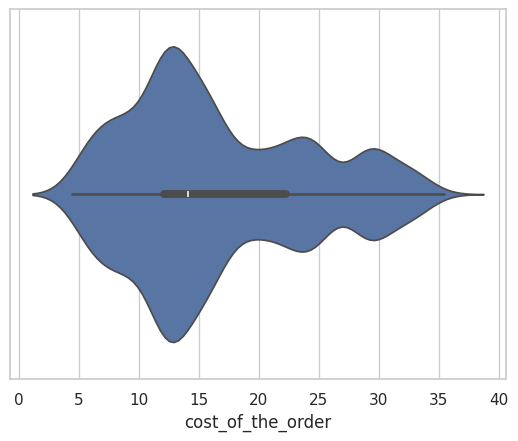

In [ ]:
# 5. Example: Violin plot for cost of the order
sns.violinplot(data=df, x='cost_of_the_order')
plt.show();

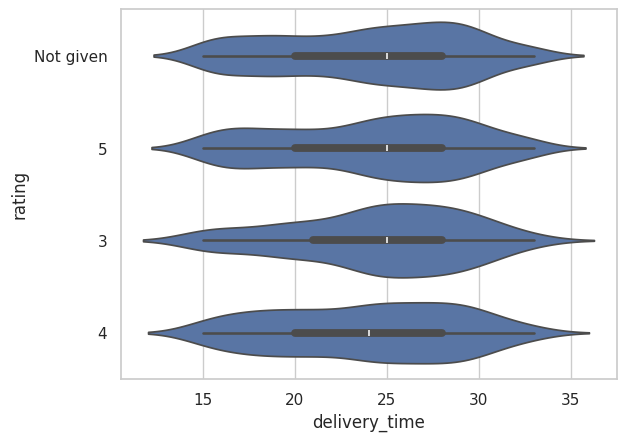

In [ ]:
# 6. Example: Violin PLot of delivery time vs. rating
sns.violinplot(data=df, x='delivery_time', y='rating')
plt.show();

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


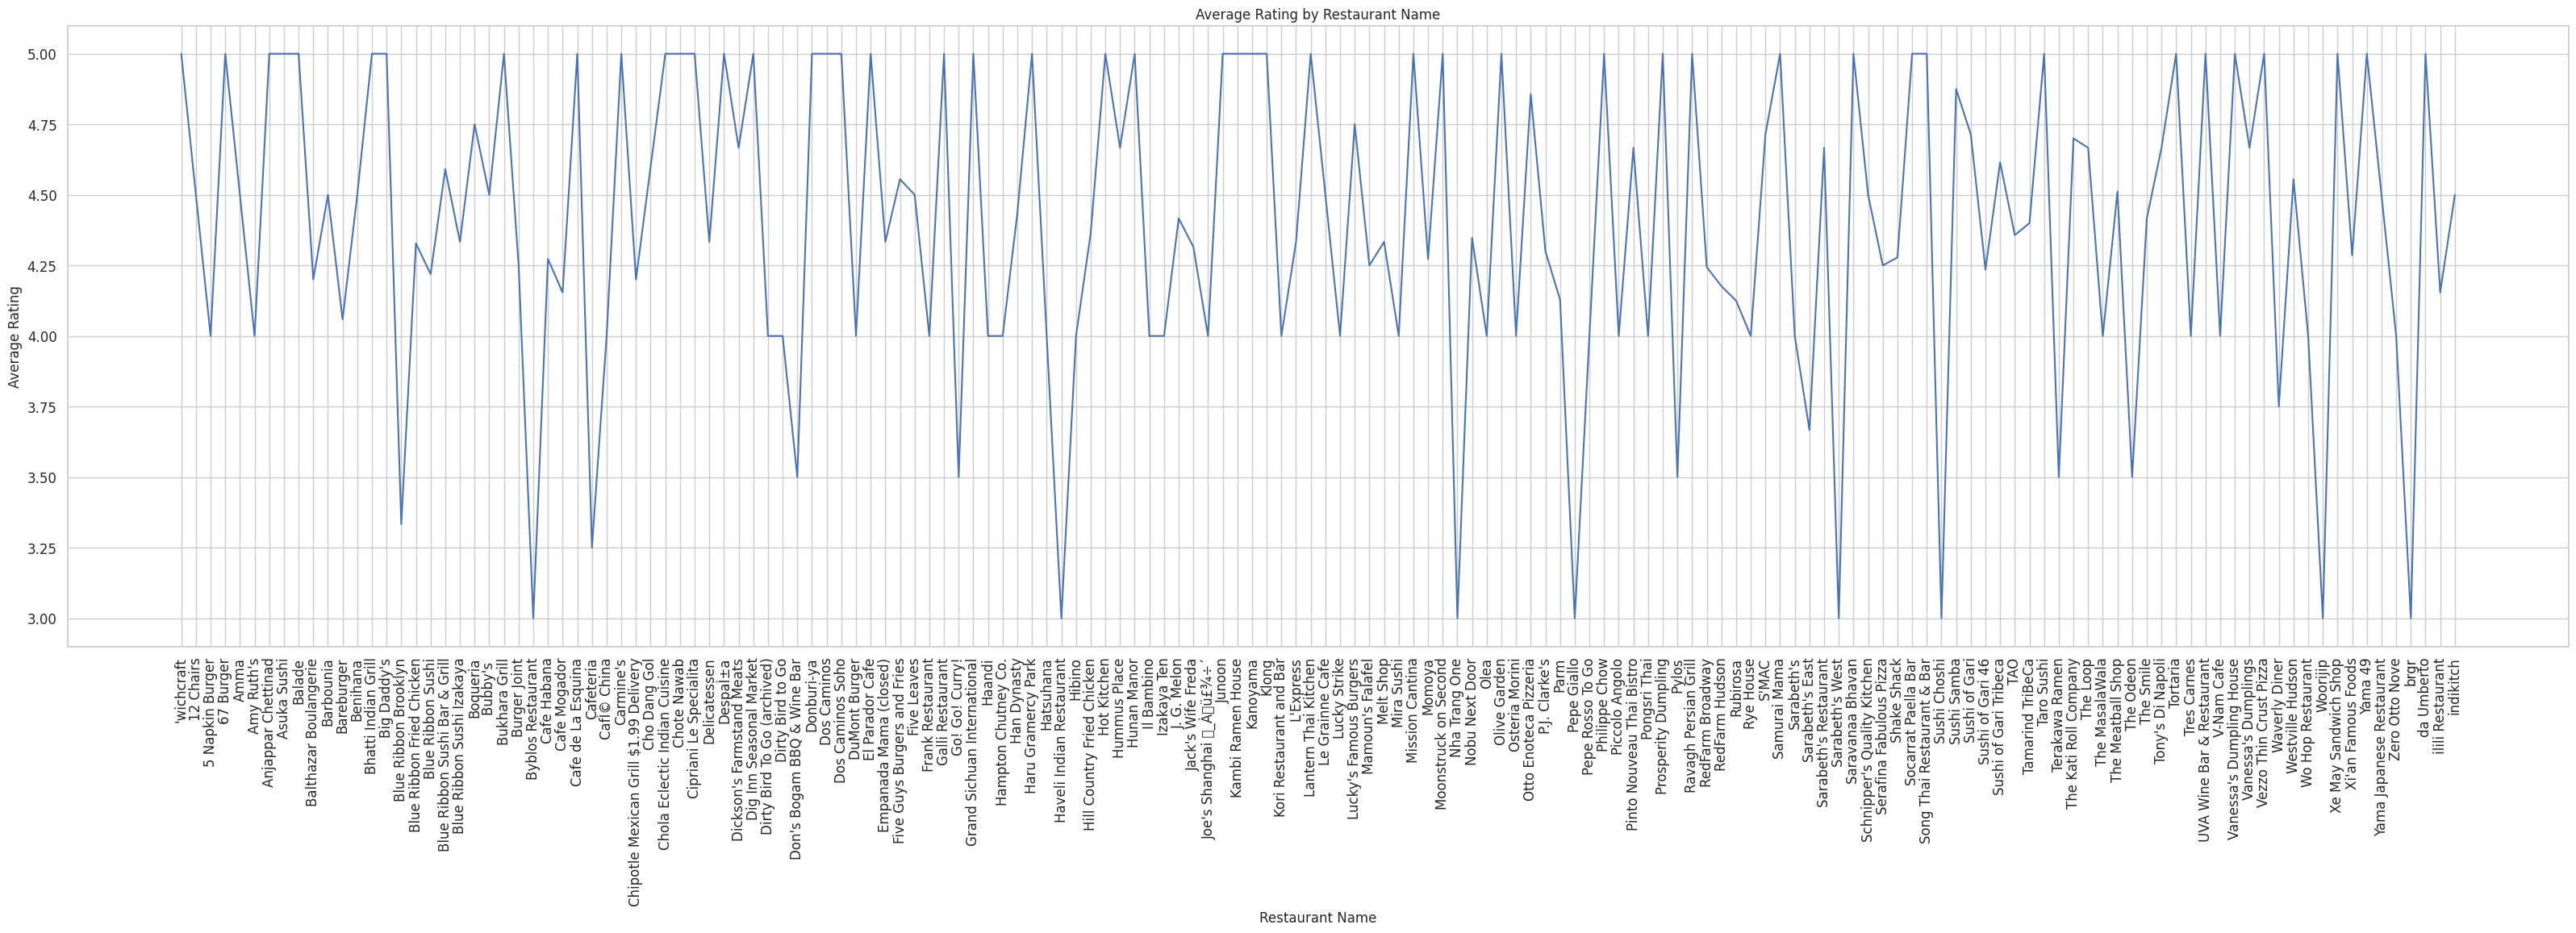

In [ ]:
# 7. Convert 'rating' to numeric, handling non-numeric values
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by restaurant name and calculate the average rating
restaurant_ratings = df.groupby('restaurant_name')['rating'].mean().reset_index()

# Drop restaurants with NaN ratings
restaurant_ratings = restaurant_ratings.dropna()

# Line plot of restaurant name and average rating
plt.figure(figsize=(40, 10))
sns.lineplot(data=restaurant_ratings, x='restaurant_name', y='rating')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Average Rating by Restaurant Name')
plt.xlabel('Restaurant Name')
plt.ylabel('Average Rating')
plt.show();

<ipython-input-158-99f1605afe2e>:18: UserWarning: Glyph 140 (\x8c) missing from current font.
  plt.tight_layout()
<ipython-input-158-99f1605afe2e>:18: UserWarning: Glyph 142 (\x8e) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


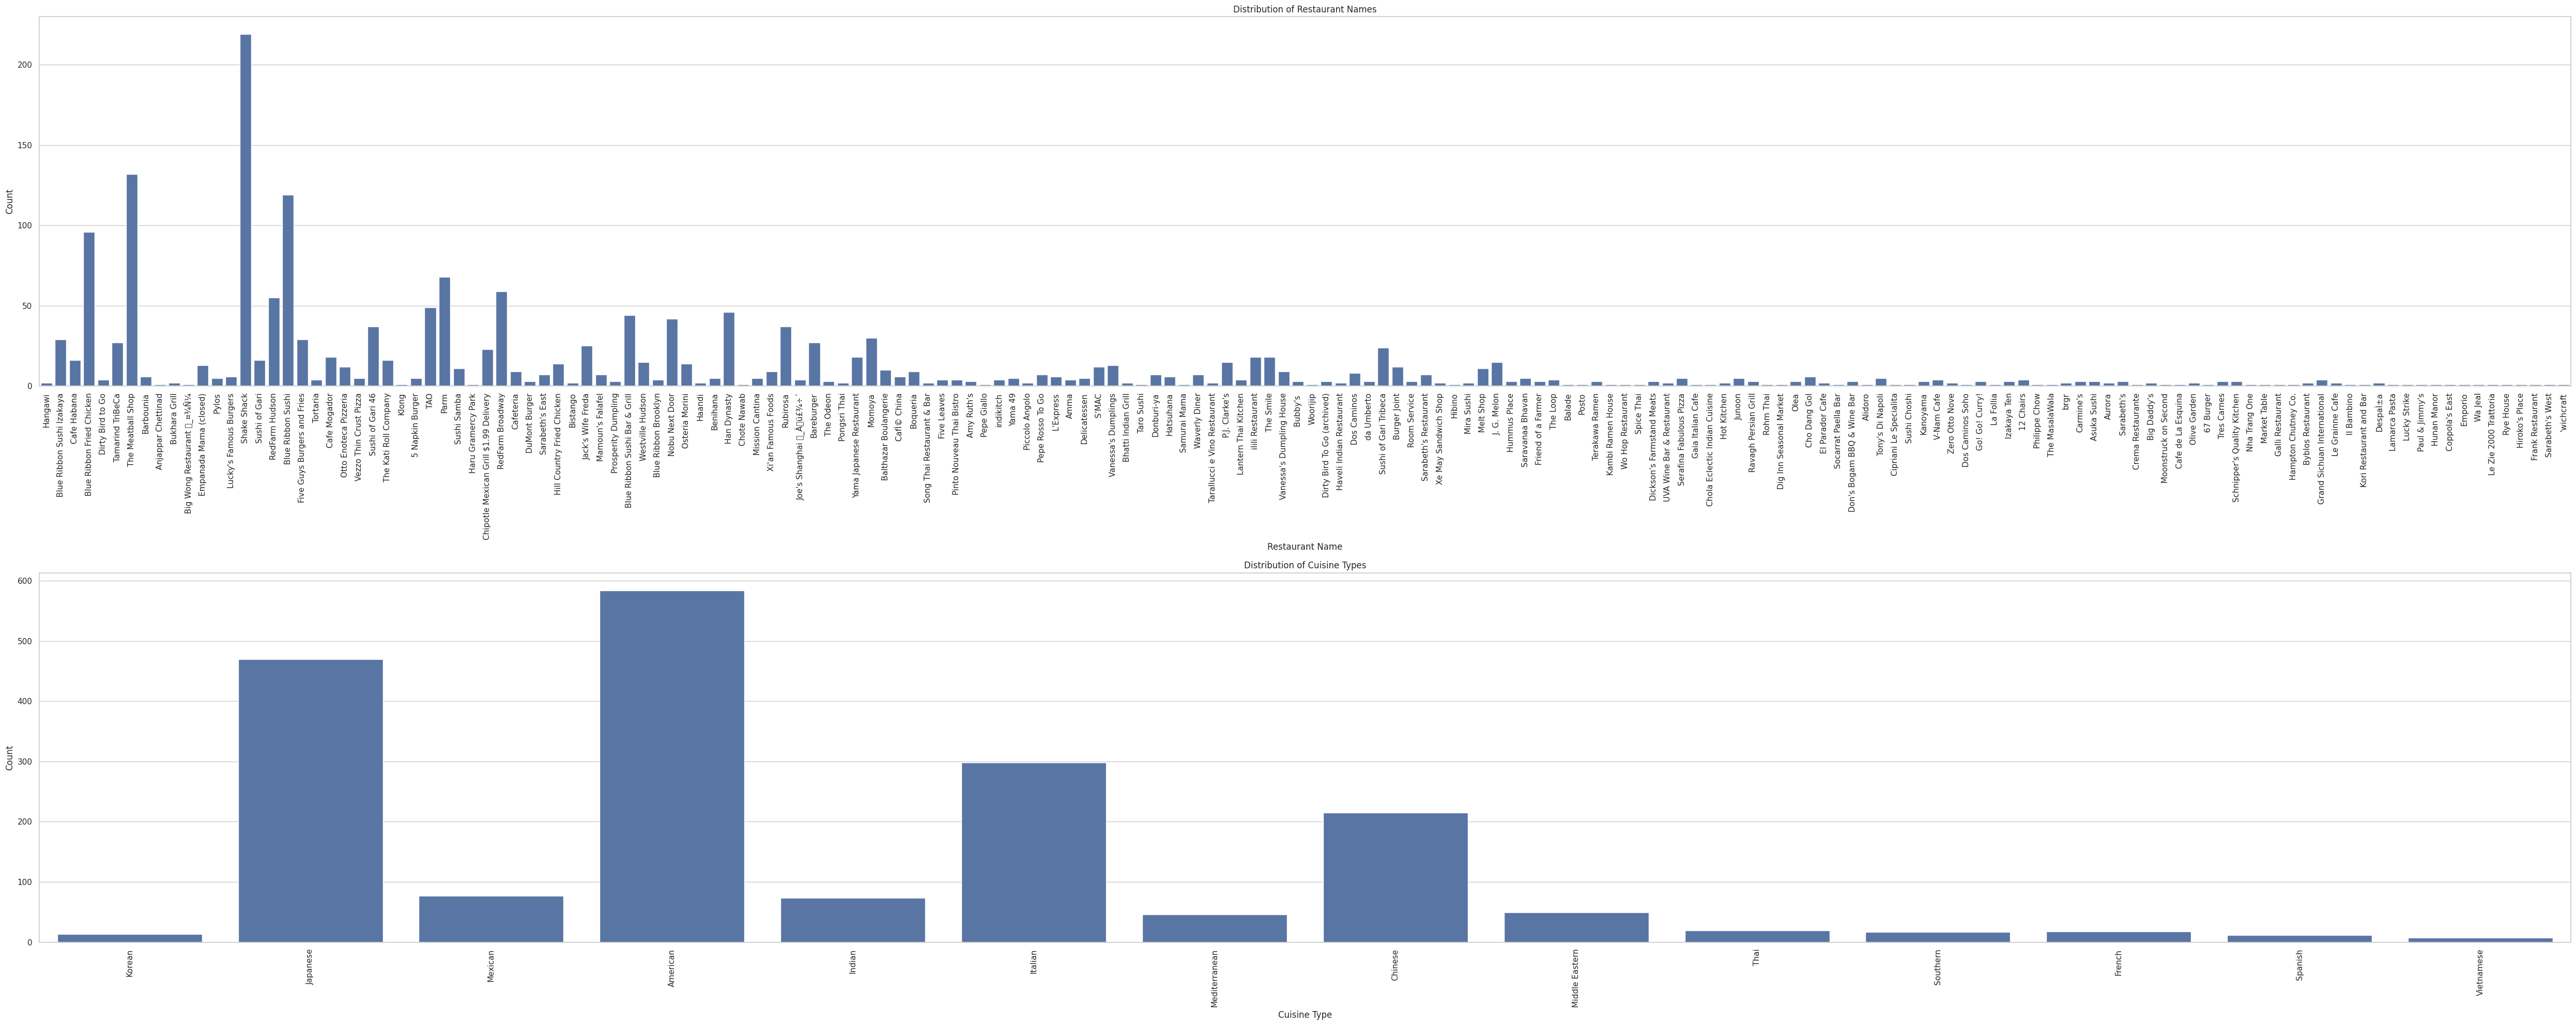

In [ ]:
# 8. Countplot with two rows: Restaurant Name and Cuisine Type
plt.figure(figsize=(50, 20))

plt.subplot(2, 1, 1)
sns.countplot(data=df, x='restaurant_name')
plt.title('Distribution of Restaurant Names')
plt.xticks(rotation=90)
plt.xlabel('Restaurant Name')
plt.ylabel('Count')

plt.subplot(2, 1, 2)
sns.countplot(data=df, x='cuisine_type')
plt.title('Distribution of Cuisine Types')
plt.xticks(rotation=90)
plt.xlabel('Cuisine Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show();

<Figure size 1000x500 with 0 Axes>

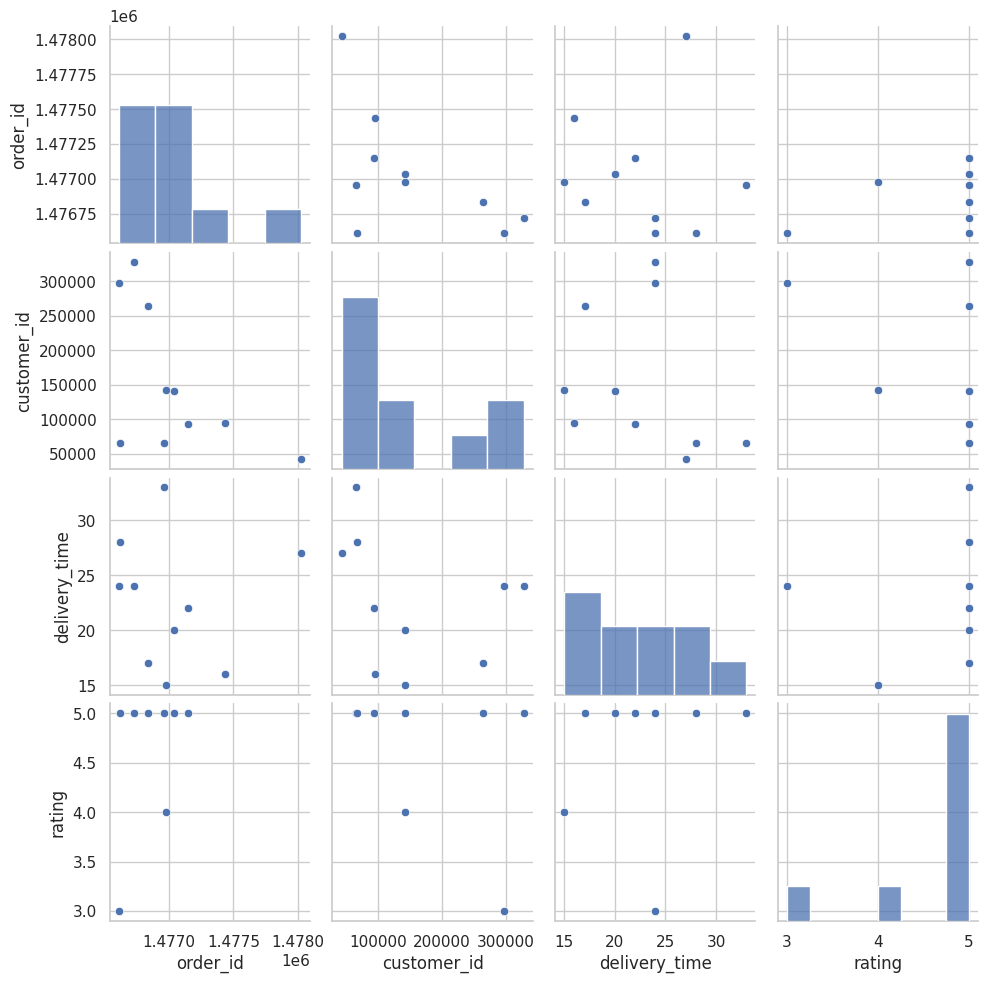

In [ ]:
# 9. Example: Pairplot for Order id, Customer id, Delivery Time, Rating
subset_df = df.sample(n=10, random_state=5)
plt.figure(figsize=(10, 5))
sns.pairplot(data=subset_df, vars=['order_id', 'customer_id', 'delivery_time', 'rating'])
plt.show();

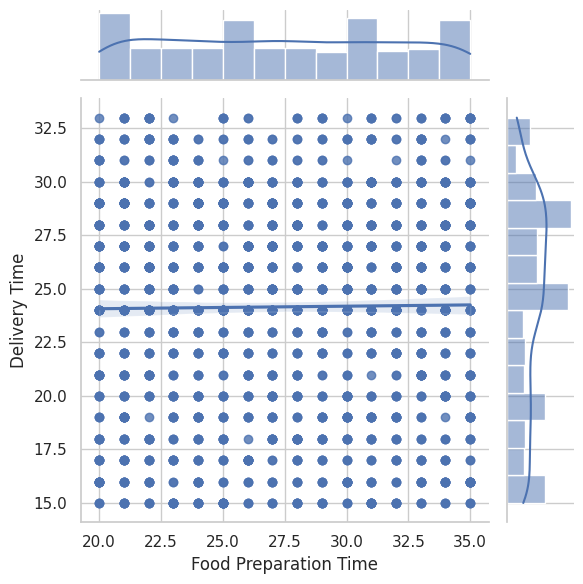

In [ ]:
# 10. Example: Jointplot for Food Preparation Time, Delivery Time. White Grid enabled
sns.set(style="whitegrid")
sns.jointplot(data=df, x='food_preparation_time', y='delivery_time', kind="reg")
plt.xlabel("Food Preparation Time")
plt.ylabel("Delivery Time")
plt.tight_layout()
plt.show();

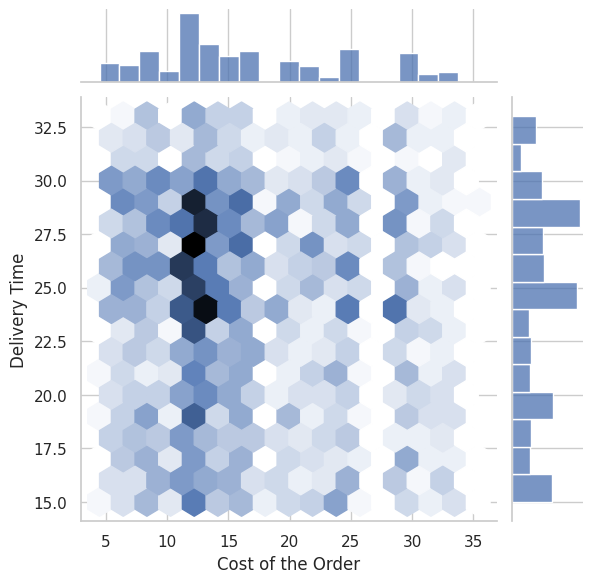

In [ ]:
# 11. Example: Jointplot for Cost of the Order vs. Delivery Time
sns.set(style="whitegrid")
g = sns.jointplot(data=df, x='cost_of_the_order', y='delivery_time', kind="hex")
plt.colorbar
g.set_axis_labels("Cost of the Order", "Delivery Time")
plt.show();

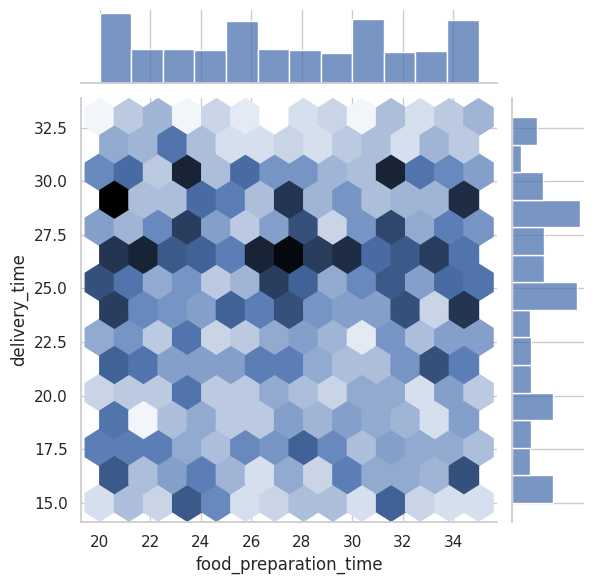

In [ ]:
# 12. Example: Hexbin plot of Food Preparation Time and Delivery Time
sns.set(style="whitegrid")
plt.colorbar
g = sns.jointplot(data=df, x='food_preparation_time', y='delivery_time', kind="hex")
plt.show();

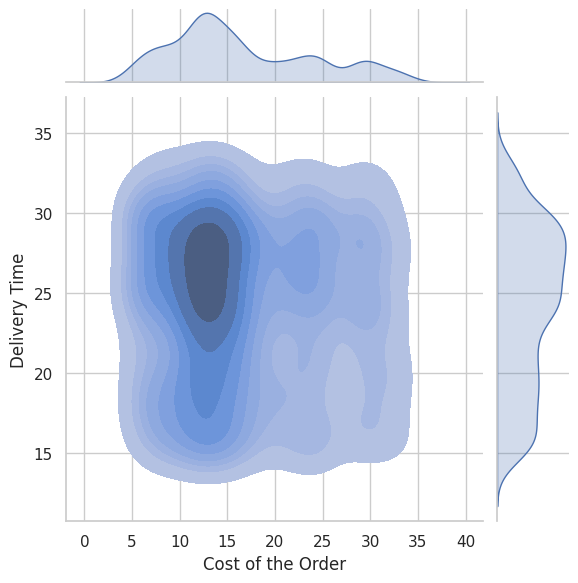

In [ ]:
# 13. Example: Jointplot for Cost of the Order and Delivery Time with Kind kde and fill True
sns.set(style="whitegrid")
g = sns.jointplot(data=df, x='cost_of_the_order', y='delivery_time', kind="kde", fill=True)
g.set_axis_labels("Cost of the Order", "Delivery Time")

plt.show();

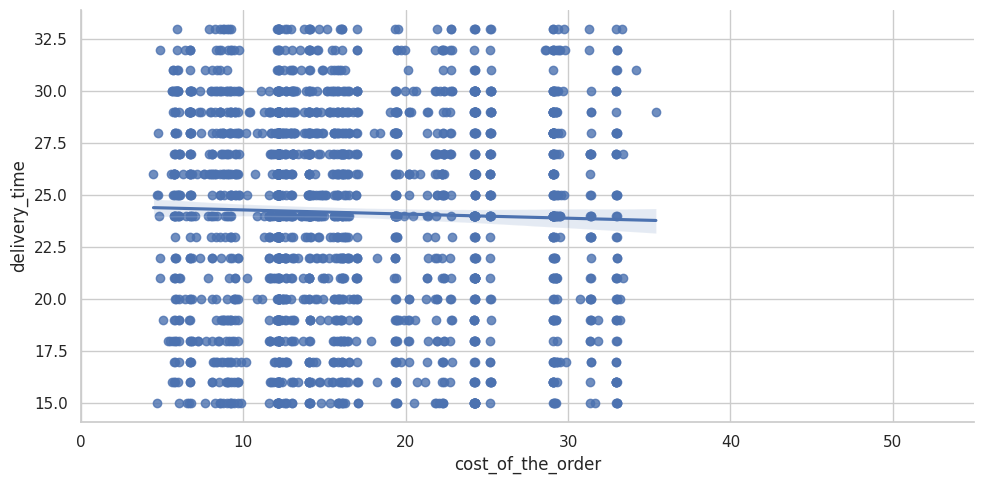

In [ ]:
# 14. Example: Limplot of Cost of the Order and Delivery Time
sns.lmplot(data=df, x='cost_of_the_order', y='delivery_time', height=5, aspect=2)
plt.xlim(0,55)
plt.tight_layout()
plt.show();

In [ ]:
# 15. Example: Column view of Cost of the Order and Delivery Time
df[['cost_of_the_order','delivery_time']].corr()

,cost_of_the_order,delivery_time
cost_of_the_order,1.000000,-0.029949
delivery_time,-0.029949,1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


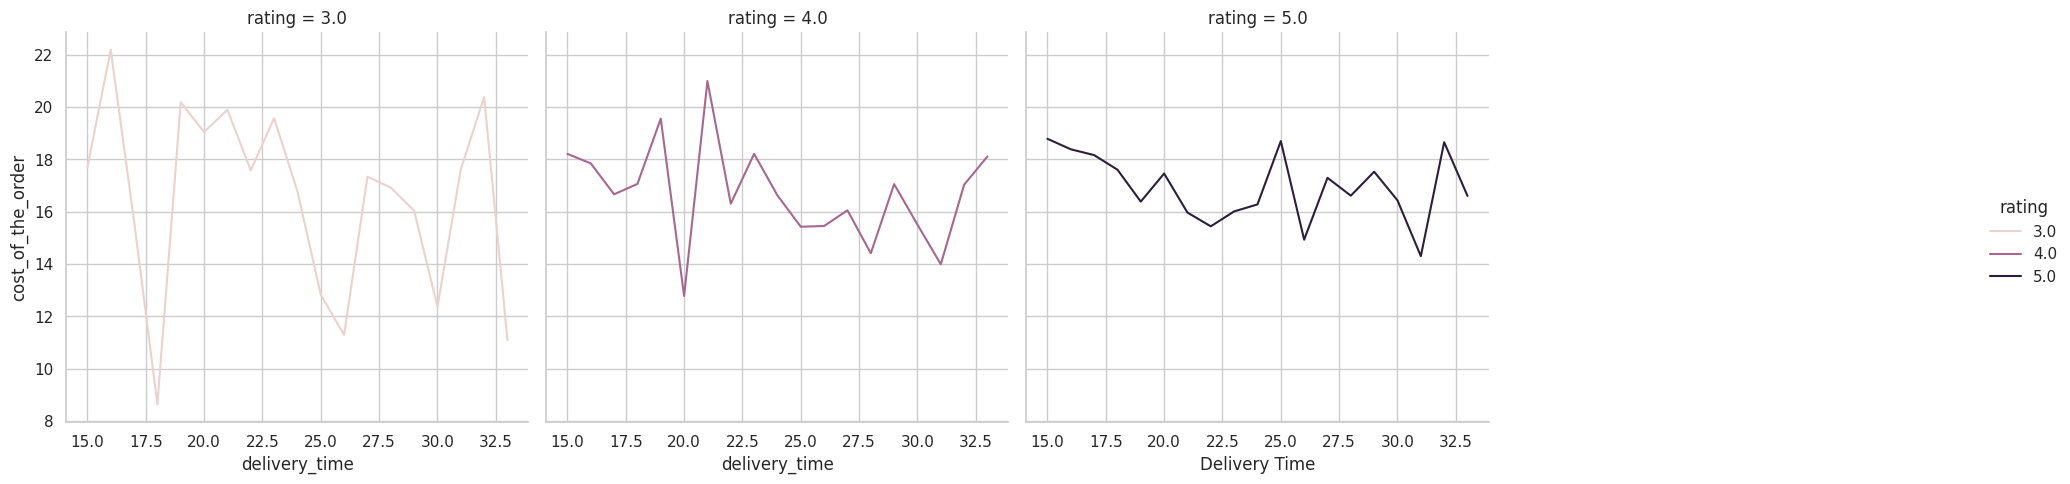

In [ ]:
# 16. Convert 'rating' to numeric, handling non-numeric values
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Replot of Delivery Time, Cost of the Order, and Rating
sns.relplot(data=df, x='delivery_time', y='cost_of_the_order', hue='rating', kind='line', ci=None, col='rating', col_wrap=4)
plt.xlabel('Delivery Time')
plt.ylabel('Cost of the Order')
plt.show();

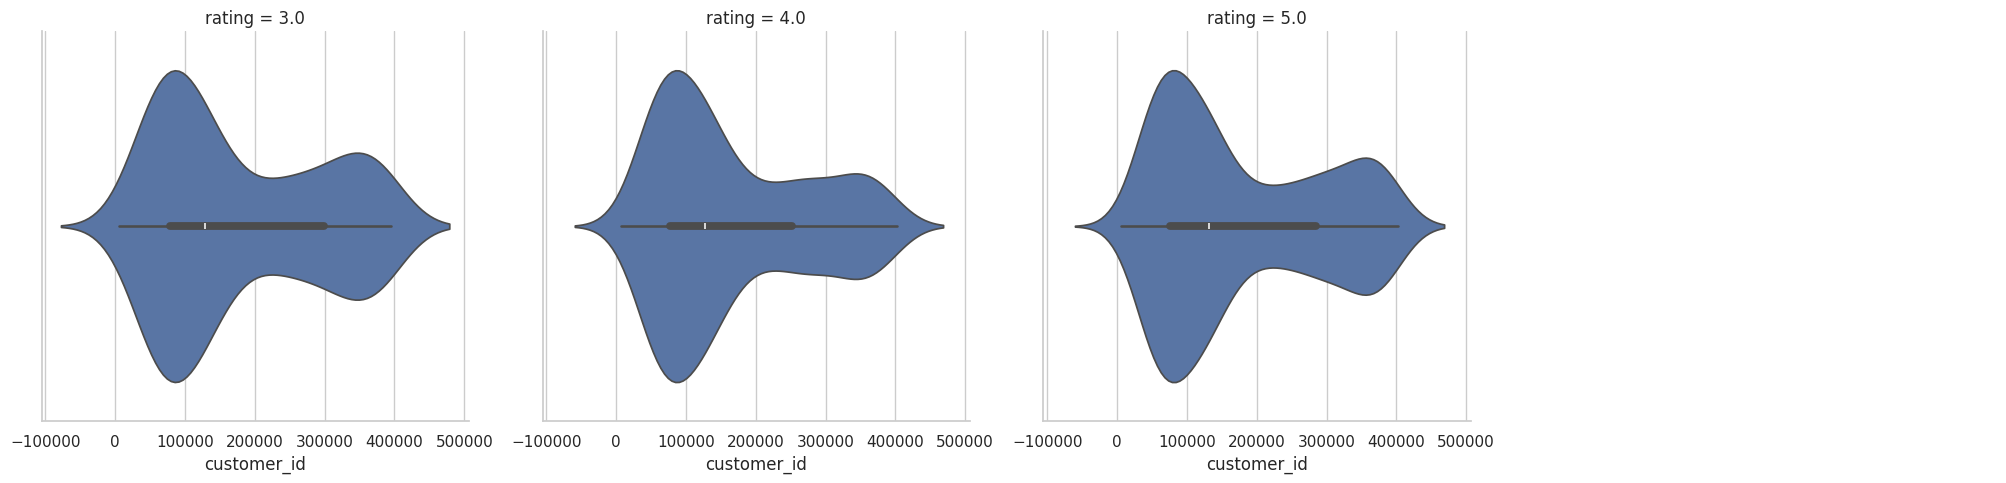

In [ ]:
# 17. Example: Catplot of Customer Id and Rating in Violin kind
sns.catplot(x='customer_id',
            col='rating',
            data=df,
            col_wrap=4,
            kind="violin")
plt.show();

<ipython-input-168-76f150d03da5>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='delivery_time', y='cost_of_the_order', ci=None)


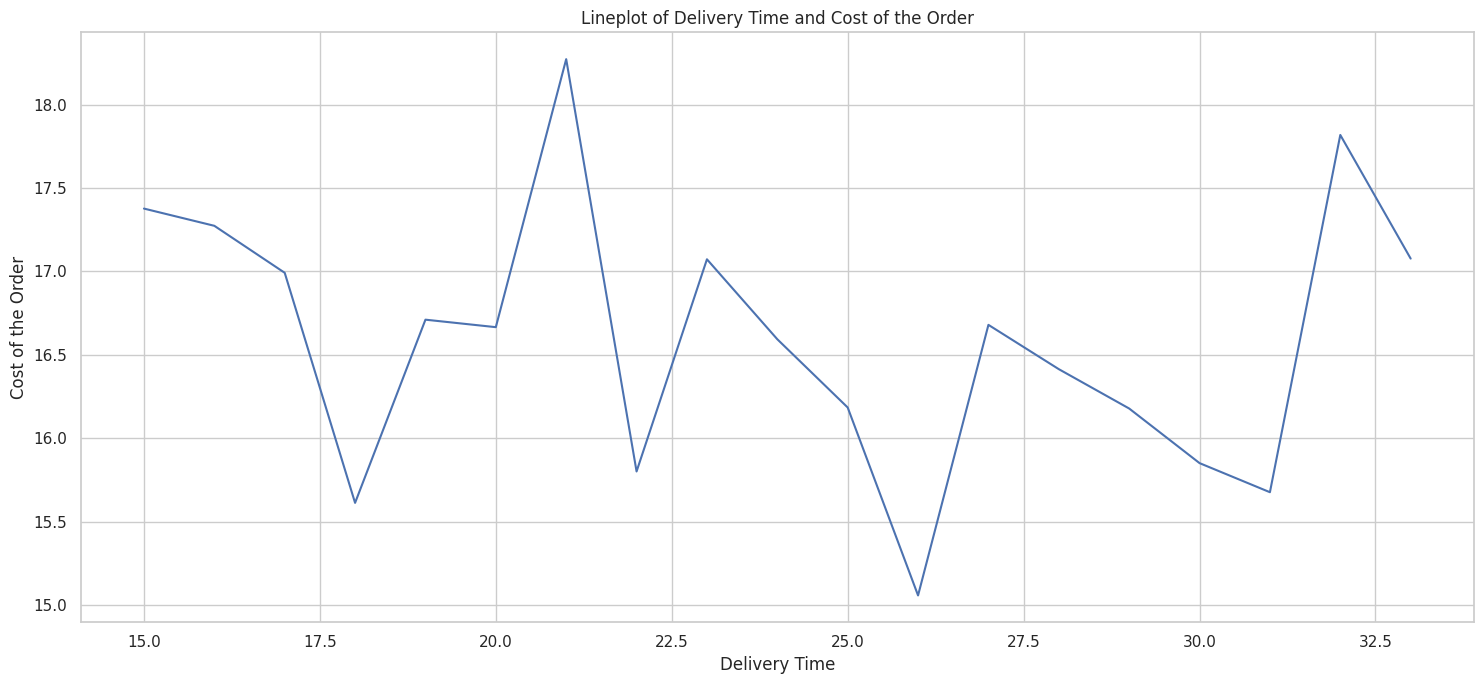

In [ ]:
# 18. Lineplot of Delivery Time and Cost of the Order
plt.figure(figsize=(15, 7))
sns.lineplot(data=df, x='delivery_time', y='cost_of_the_order', ci=None)
plt.xlabel('Delivery Time')
plt.ylabel('Cost of the Order')
plt.title('Lineplot of Delivery Time and Cost of the Order')
plt.tight_layout()
plt.show();

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Question 13. The company wants to provide a promotional offer in the advertisement of the restaurants
data = {
    'restaurant_name': ['shake Shack', 'The Meatball Shop', 'Blue Ribbon Shushi', 'Blue Ribbon Fried Chicken'],
    'rating_count': [75, 30, 60, 55],
    'average_rating': [4.5, 4.0, 4.8, 3.9]
}
df = pd.DataFrame(data)
filtered_restaurants = df[(df['rating_count'] > 50) & (df['average_rating'] > 4.0)]
print(filtered_restaurants)

      restaurant_name  rating_count  average_rating
0         shake Shack            75             4.5
2  Blue Ribbon Shushi            60             4.8


#### Observations: Shake Shack and Blue Ribbon Shushi Meet the criteria.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Question 14. The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars
def calculate_net_revenue(orders):
    total_revenue = 0

    for order in orders:
        order_cost = order["cost"]

        if order_cost > 20:
            revenue = order_cost * 0.25
        elif order_cost > 5:
            revenue = order_cost * 0.15
        else:
            revenue = 0

        total_revenue += revenue

    return total_revenue


orders = [
    {"cost": 15},   # 15 * 0.15 = 2.25
    {"cost": 25},   # 25 * 0.25 = 6.25
    {"cost": 10},   # 10 * 0.15 = 1.5
    {"cost": 30},   # 30 * 0.25 = 7.5
]

net_revenue = calculate_net_revenue(orders)
print(f"Net Revenue: ${net_revenue:.2f}")

Net Revenue: $17.50


#### Observations: The net revenue from orders is $17.50.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Question 15. Delivery times that take more than 60 minutes
delivery_times = [45, 50, 55, 60, 65, 70, 75, 80, 85]
count_long_deliveries = sum(1 for time in delivery_times if time > 60)
total_orders = len(delivery_times)
percentage_long_deliveries = (count_long_deliveries / total_orders) * 100
print(f"Percentage of orders taking more than 60 minutes: {percentage_long_deliveries:.2f}%")

Percentage of orders taking more than 60 minutes: 55.56%


#### Observations: Percentage of orders taking more than 60 minutes: 55.56%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

Mean Delivery Time by Day Category:
day_category
Weekday    32.4
Weekend    42.5
Name: delivery_time, dtype: float64


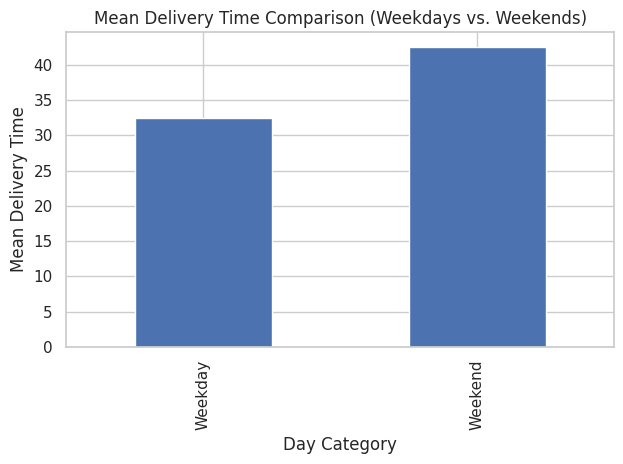

In [ ]:
# Question 16. The company wants to analyze the delivery time of the orders on weekdays and weekends
data = {
    'day_of_the_week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'delivery_time': [30, 32, 31, 35, 34, 40, 45]
}

df = pd.DataFrame(data)
df['day_category'] = df['day_of_the_week'].apply(lambda day: 'Weekend' if day in ['Saturday', 'Sunday'] else 'Weekday')
delivery_time_by_day = df.groupby('day_category')['delivery_time'].mean()
print("Mean Delivery Time by Day Category:")
print(delivery_time_by_day)
delivery_time_by_day.plot(kind='bar')
plt.xlabel('Day Category')
plt.ylabel('Mean Delivery Time')
plt.title('Mean Delivery Time Comparison (Weekdays vs. Weekends)')
plt.tight_layout()
plt.show();

#### Observations: Weekday is 32.4%, Weekend is 42.5%.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
The analysis of the dataset has provided several key insights into the performance and preferences within the food delivery business. Firstly, it is clear that certain restaurants, such as Shake Shack, The Meatball Shop, and Blue Ribbon Sushi, consistently receive a high volume of orders, indicating strong customer loyalty and satisfaction. These restaurants have effectively captured a significant market share and have a strong presence in the delivery ecosystem.

Additionally, American cuisine stands out as the most popular choice, particularly on weekends. This suggests a cultural or habitual preference for American dishes during leisure days, likely due to comfort food being a popular choice for relaxation and social gatherings. The significant percentage of orders costing more than $20 highlights a customer base that values quality and is willing to pay a premium for their food. The average delivery time of 24.16 minutes appears to be within a reasonable range, although there is room for improvement, especially on busier days.

The frequent customer analysis shows that a core group of customers is highly engaged, placing multiple orders over time. These customers represent a valuable segment that can be further nurtured. The correlation between delivery times, order costs, and customer ratings indicates that efficiency in service delivery positively impacts customer satisfaction and perceived value.

### Recommendations:
1. **Enhance Popular Offerings**: To capitalize on the popularity of American cuisine, consider expanding the menu with new American dishes and creating special weekend promotions. This can attract more customers and increase order volumes during peak times. Highlighting these options in marketing campaigns can further boost their visibility and appeal.

2. **Implement Loyalty Programs**: Developing a comprehensive loyalty program for frequent customers can drive repeat business and foster brand loyalty. Offer personalized discounts, early access to new menu items, and exclusive deals to reward loyal customers. This strategy can enhance customer retention and increase the lifetime value of each customer.

3. **Optimize Delivery Efficiency**: Improving the delivery process is crucial for maintaining high customer satisfaction. Consider implementing advanced logistics software to optimize delivery routes and reduce wait times. Partnering with efficient delivery services and offering customers the option to choose expedited delivery for an additional fee can also enhance the delivery experience.

4. **Target High-Spending Customers**: Identify and target customers who frequently spend more than $20 per order with premium offerings and exclusive deals. This can include gourmet options, meal bundles, or limited-time high-value items. Emphasizing the quality and uniqueness of these offerings can justify the higher price point and attract discerning customers.

5. **Enhance Customer Feedback Mechanisms**: Utilize customer ratings to identify areas for improvement and take proactive measures to address them. For restaurants with lower ratings, conduct detailed reviews to understand the issues and implement changes to improve food quality, preparation time, and overall service. Encouraging customers to provide feedback through follow-up messages or incentives can also provide valuable insights.

6. **Promote Undervalued Cuisines**: For cuisines that receive fewer orders but have high ratings, develop targeted marketing campaigns to increase their visibility. Highlighting unique dishes, chef specials, or cultural significance can attract new customers and diversify the cuisine options being ordered. Collaborating with food influencers or hosting themed events can further enhance the appeal of these cuisines.

By implementing these recommendations, the business can improve customer satisfaction, increase order volumes, and drive overall growth. Focusing on popular offerings, enhancing service efficiency, and nurturing customer relationships will create a more robust and competitive presence in the food delivery market.

---